In [1]:
import csv
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

In [2]:
file_name = "lab_vehicle.csv"
def read_csv(file_name):
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        data = []
        for row in reader:
            data.append([float(value) for value in row])
    return data

In [3]:
def euclidean_distance(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

In [4]:
def initialize_centroids(data, k):
    return random.sample(data, k)

In [5]:
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest = distances.index(min(distances))
        clusters[closest].append(point)
    return clusters

In [7]:
def update_centroids(clusters):
    centroids = []
    for cluster in clusters:
        if cluster:
            centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
            centroids.append(centroid)
        else:
            centroids.append([0]*len(clusters[0][0]))
    return centroids

In [8]:
def kmeans(data, k, iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids
    return centroids, clusters

In [9]:
def calculate_inertia(data, centroids, clusters):
    inertia = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            inertia += euclidean_distance(point, centroids[i]) ** 2
    return inertia

In [11]:
def elbow_method(data, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans(data, k)
        inertia = calculate_inertia(data, centroids, clusters)
        inertias.append(inertia)
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()
    return inertias

In [12]:
def silhouette_score(data, labels):
    n = len(data)
    unique_labels = set(labels)
    score_total = 0

    for i in range(n):
        same_cluster = [data[j] for j in range(n) if labels[j] == labels[i] and j != i]
        other_clusters = [data[j] for j in range(n) if labels[j] != labels[i]]
        a = sum(euclidean_distance(data[i], p) for p in same_cluster) / len(same_cluster) if same_cluster else 0
        b = float('inf')
        for label in unique_labels:
            if label != labels[i]:
                other_points = [data[j] for j in range(n) if labels[j] == label]
                b = min(b, sum(euclidean_distance(data[i], p) for p in other_points) / len(other_points))
        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        score_total += s
    return score_total / n

In [13]:
def davies_bouldin_index(clusters, centroids):
    k = len(clusters)
    scatters = []
    for i in range(k):
        scatter = sum(euclidean_distance(p, centroids[i]) for p in clusters[i]) / len(clusters[i]) if clusters[i] else 0
        scatters.append(scatter)

    db_index = 0
    for i in range(k):
        max_rij = 0
        for j in range(k):
            if i != j:
                rij = (scatters[i] + scatters[j]) / euclidean_distance(centroids[i], centroids[j])
                max_rij = max(max_rij, rij)
        db_index += max_rij
    return db_index / k

In [14]:
def calinski_harabasz_index(data, clusters, centroids):
    k = len(clusters)
    n = len(data)
    overall_mean = [sum(dim) / n for dim in zip(*data)]
    B = sum(len(clusters[i]) * euclidean_distance(centroids[i], overall_mean) ** 2 for i in range(k))
    W = sum(sum(euclidean_distance(p, centroids[i]) ** 2 for p in clusters[i]) for i in range(k))
    return (B / (k - 1)) / (W / (n - k)) if W != 0 else 0

In [15]:
def main():
    file_name = "lab_vehicle.csv"
    data = read_csv(file_name)

    print("Running Elbow Method...")
    inertias = elbow_method(data, max_k=10)

    k = 2
    centroids, clusters = kmeans(data, k)
    labels = [i for i, cluster in enumerate(clusters) for _ in cluster]

    flat_data = [point for cluster in clusters for point in cluster]

    print(f"\nSilhouette Score: {silhouette_score(flat_data, labels):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_index(clusters, centroids):.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_index(flat_data, clusters, centroids):.4f}")


Running Elbow Method...


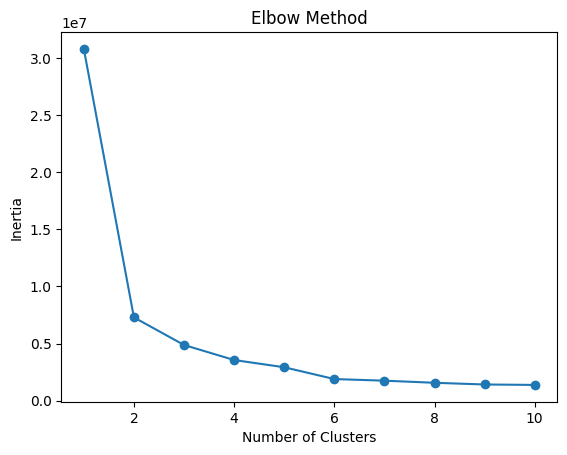


Silhouette Score: 0.6735
Davies-Bouldin Index: 0.4479
Calinski-Harabasz Index: 2722.5059


In [16]:
if __name__ == "__main__":
    main()

In [23]:
data_wholesale = read_csv('wholesale_data.csv')

In [24]:
#skipping the 'Channel' and 'Region' columns
def read_csv_skip_first_two(file_name):
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        data = []
        for row in reader:
            data.append([float(value) for value in row[2:]])  #starts from the 3rd column
    return data

In [27]:
def main():
    file_name = "wholesale_data.csv"
    data_wholesale = read_csv_skip_first_two(file_name)

    print("Running Elbow Method for Wholesale Customers Dataset...")
    elbow_method(data_wholesale, max_k=10)

    k = 2

    centroids_w, clusters_w = kmeans(data_wholesale, k)


    labels_w = [i for i, cluster in enumerate(clusters_w) for _ in cluster]
    flat_data_w = [point for cluster in clusters_w for point in cluster]

    print(f"\nSilhouette Score (Wholesale): {silhouette_score(flat_data_w, labels_w):.4f}")
    print(f"Davies-Bouldin Index (Wholesale): {davies_bouldin_index(clusters_w, centroids_w):.4f}")
    print(f"Calinski-Harabasz Index (Wholesale): {calinski_harabasz_index(flat_data_w, clusters_w, centroids_w):.4f}")

Running Elbow Method for Wholesale Customers Dataset...


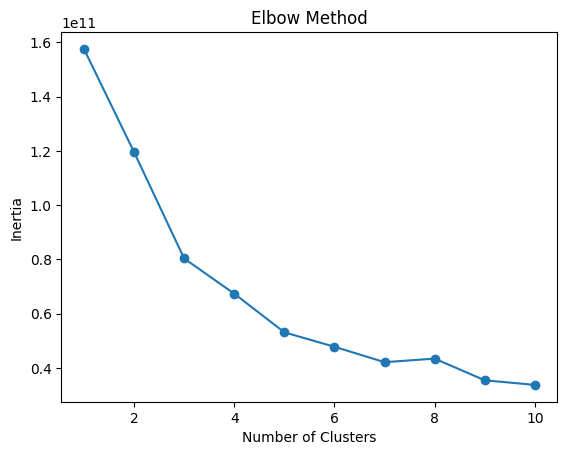


Silhouette Score (Wholesale): 0.4585
Davies-Bouldin Index (Wholesale): 1.0934
Calinski-Harabasz Index (Wholesale): 139.3301


In [28]:
if __name__ == "__main__":
    main()